In [12]:
import tensorflow as tf

base_model = tf.keras.applications.ResNet50(
input_shape=(32, 32, 3),
include_top=False,
weights=None,
)
base_model = tf.keras.Model(
base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
)

inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(10)(x)
model = tf.keras.Model(inputs, x)

model.compile(
optimizer=tf.keras.optimizers.Adam(lr=0.0001),
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=["accuracy"],
)
model.load_weights("best_modeltrain-aug-v_2")

In [13]:
batch_size = 8
test_data='../data/label_book'
test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=batch_size,
    image_size=(32, 32),
)


Found 52 files belonging to 10 classes.


In [30]:
import numpy as np
y_true_test=np.argmax(np.concatenate([y for x, y in test], axis=0),axis=1)
y_true_test=[_+1 for _ in y_true_test]
np.array(y_true_test)
y_true_test=np.array(y_true_test)
y_true_test

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10])

In [29]:

y_hat_test=np.argmax(model.predict(test),axis=1)
y_hat_test=[_+1 for _ in y_hat_test]
y_hat_test=np.array(y_hat_test)
y_hat_test

array([ 1,  1,  1,  1,  1,  2,  3,  3,  2,  2,  3,  3,  3,  3,  3,  1,  4,
        4,  4,  4,  4,  5,  5,  1,  5,  5,  5,  2,  6,  6,  6,  6,  7,  3,
        7,  7,  8,  8,  8,  8,  8,  7,  9,  9,  4,  2,  9,  9, 10, 10, 10,
        9])

In [ ]:
for true, pred in zip(y_true_test,y_hat):
    if true==pred:
        print(pred,'✅')
    if true!=pred:
        print(pred,'❌')

In [31]:
#get frequency of labels
import collections

d=dict(collections.Counter(y_hat_test))
d
#show frequency of labels in descending order
sorted([(k,v)for k,v in d.items()],key=lambda item:item[1],reverse=True)


[(3, 8),
 (1, 7),
 (4, 6),
 (2, 5),
 (5, 5),
 (8, 5),
 (9, 5),
 (6, 4),
 (7, 4),
 (10, 3)]

In [ ]:
d[1]

In [ ]:
accuracy=1-sum(y_true_test!=y_hat_test)/len(y_hat_test)
print(f"Accuracy: {accuracy}")
model.evaluate(test)



In [33]:
index_mislabeled[-2]

47

../data/label_book/ii/a3ef6ed0-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 3


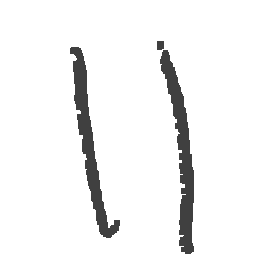


../data/label_book/ii/a3e33dcc-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 3


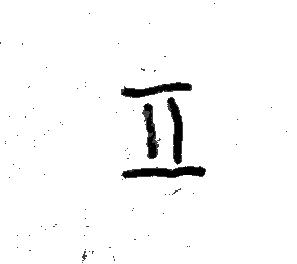


../data/label_book/vii/a5ade382-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 1


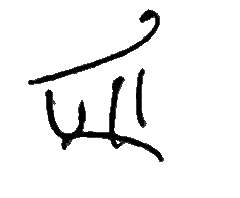


../data/label_book/viii/a626842c-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 1


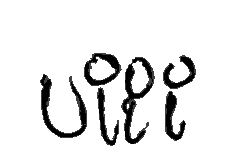


../data/label_book/iv/a7183a10-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 2


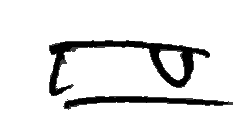


../data/label_book/ix/a7967416-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 3


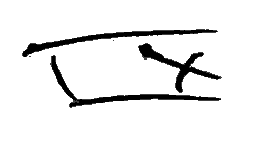


../data/label_book/v/a8e27400-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 8


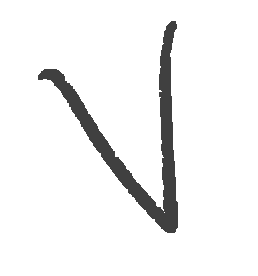


../data/label_book/x/a9b14348-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 7


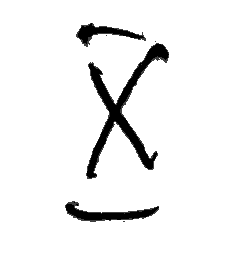


../data/label_book/x/a9e4f63e-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 4


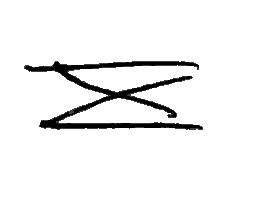


../data/label_book/x/a9a4255a-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 2


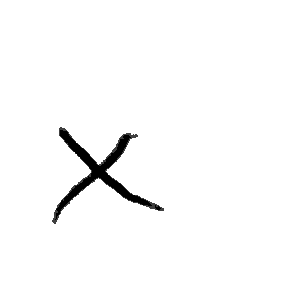


../data/label_book/iii/aa864ee4-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 9


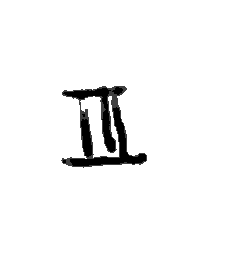


../data/label_book/iii/aaa15680-ce5d-11eb-b317-38f9d35ea60f.png
Labelled as: 9


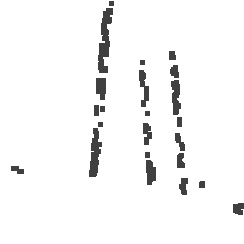

In [37]:
from IPython.display import Image, display
from pathlib import Path

index_mislabeled=[]
for i,bad_pred in enumerate(y_true_test!=y_hat_test):
    if bad_pred:
        index_mislabeled.append(i)
len(index_mislabeled)



def print_imgs_from_indices(indices,img_dir_path):
    p = Path(img_dir_path)
    all_img_paths=list(p.glob('**/*.png'))
    for i in indices:
        print(str(all_img_paths[i]))
        print(f"Labelled as: {y_hat_test[i]}")
        display(Image(filename=all_img_paths[i]))
        print()



    #Image(filename='test.png')
#for i in indices_of_wrong_pred:
    #print(f'Predicted: {pred_labels[i]+1} Actual: {y_labels[i]+1}')
print_imgs_from_indices(index_mislabeled,'../data/label_book')
#Something is not right here....

In [14]:
batch_size = 8
val_data='../data/val-clean'
val = tf.keras.preprocessing.image_dataset_from_directory(
    val_data,
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=batch_size,
    image_size=(32, 32),
)


Found 764 files belonging to 10 classes.


In [21]:
import numpy as np
y_true=np.argmax(np.concatenate([y for x, y in val], axis=0),axis=1)
y_true=[_+1 for _ in y_true]
np.array(y_true)
y_true=np.array(y_true)


y_hat=np.argmax(model.predict(val),axis=1)
y_hat=[_+1 for _ in y_hat]
y_hat=np.array(y_hat)

#get frequency of labels
import collections

d=dict(collections.Counter(y_hat))
d
#show frequency of labels in descending order
sorted([(k,v)for k,v in d.items()],key=lambda item:item[1],reverse=True)


[(4, 90),
 (7, 84),
 (1, 81),
 (5, 79),
 (3, 76),
 (6, 75),
 (8, 72),
 (2, 71),
 (9, 70),
 (10, 66)]

In [23]:
d=dict(collections.Counter(y_true))
d
#show frequency of true labels in descending order
sorted([(k,v)for k,v in d.items()],key=lambda item:item[1],reverse=True)

[(8, 83),
 (6, 82),
 (2, 81),
 (4, 81),
 (5, 78),
 (9, 75),
 (1, 74),
 (3, 70),
 (7, 70),
 (10, 70)]

In [20]:
model.evaluate(val)

96/96 [==============================] - 1s 6ms/step - loss: 0.6359 - accuracy: 0.8678


[0.6359488368034363, 0.8678010702133179]

In [24]:
d=dict(collections.Counter(y_hat))
d
#show frequency of labels in descending order
[(k,v)for k,v in d.items()]


[(1, 81),
 (2, 71),
 (4, 90),
 (3, 76),
 (5, 79),
 (9, 70),
 (7, 84),
 (8, 72),
 (6, 75),
 (10, 66)]